In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")
print(df.to_string())



          Interaction Name  Threat Number                                                                                                                                Summary Priority        State                 Category                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Description       SDL Phase                                                                                                                                                                                                                                   

In [92]:
import pprint as pp

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

df = df[["Interaction Name", "Summary","Priority","Category","SDL Phase"]]
print(df["Summary"].to_list())

['An adversary may spoof the service or service endpoints by leveraging stale CNAME DNS records and executing a subdomain hijack attack', 'An adversary may gain unauthorized access to Web API due to poor access control checks', 'An adversary can gain access to sensitive information from an API through error messages', 'An adversary can gain access to sensitive data by sniffing traffic to Web API', "An adversary can gain access to sensitive data stored in Web API's config files", 'Attacker can deny a malicious act on an API leading to repudiation issues', 'An adversary may spoof Database and gain access to Web API', 'An adversary may inject malicious inputs into an API and affect downstream processes', 'An adversary can gain access to sensitive data by performing SQL injection through Web API', 'An adversary may spoof the service or service endpoints by leveraging stale CNAME DNS records and executing a subdomain hijack attack', 'An adversary may gain unauthorized access to Web API due 

In [93]:
threats = [
    "An adversary may spoof the service or service endpoints by leveraging stale CNAME DNS records and executing a subdomain hijack attack",
    "An adversary may gain unauthorized access to Web API due to poor access control checks",
    "An adversary can gain access to sensitive information from an API through error messages",
    "An adversary can gain access to sensitive data by sniffing traffic to Web API",
    "An adversary can gain access to sensitive data stored in Web API's config files",
    "Attacker can deny a malicious act on an API leading to repudiation issues",
    "An adversary may spoof Database and gain access to Web API",
    "An adversary may inject malicious inputs into an API and affect downstream processes",
    "An adversary can gain access to sensitive data by performing SQL injection through Web API",
    "An adversary may spoof the service or service endpoints by leveraging stale CNAME DNS records and executing a subdomain hijack attack",
    "An adversary may gain unauthorized access to Web API due to poor access control checks",
    "An adversary can gain access to sensitive information from an API through error messages",
    "An adversary can gain access to sensitive data by sniffing traffic to Web API",
    "An adversary can gain access to sensitive data stored in Web API's config files",
    "Attacker can deny a malicious act on an API leading to repudiation issues",
    "An adversary may spoof Load Balancer and gain access to Web API",
    "An adversary may inject malicious inputs into an API and affect downstream processes",
    "An adversary can gain access to sensitive data by performing SQL injection through Web API",
    "An adversary may spoof the service or service endpoints by leveraging stale CNAME DNS records and executing a subdomain hijack attack"
]
threats_abbv = [
    "Subdomain Hijacking",
    "Poor Access Control Checks",
    "Sensitive Info From Error Messages",
    "Sniffing Web API Traffic",
    "Sensitive Data in Config Files",
    "Repudiation Issues in API",
    "Spoofing",
    "Malicious Input Injection",
    "SQL Injection Through Web API",
    "Subdomain Hijacking",
    "Poor Access Control Checks",
    "Sensitive Info From Error Messages",
    "Sniffing Web API Traffic",
    "Sensitive Data in Config Files",
    "Repudiation Issues in API",
    "Spoofing",
    "Malicious Input Injection",
    "SQL Injection Through Web API",
    "Subdomain Hijacking"
]

i = 0
for t in threats_abbv:
    if t == "SQL Injection Through Web API":
        threats_abbv[i] = "SQL Injection"
    if t == "Sniffing Web API Traffic":
        threats_abbv[i] = "Man-in-the-Middle Attack"
    if t == "Malicious Input Injection":
        threats_abbv[i] = "Code Injection"
    if t == "Sensitive Info From Error Messages":
        threats_abbv[i] = "Error Handling Flaw"
    if t == "Poor Access Control Checks":
        threats_abbv[i] = "Authentication Bypass"
    if t == "Poor Access Control Checks":
        threats_abbv[i] = "Unauthorized Data Access"
    if t == "Repudiation Issues in API":
        threats_abbv[i] = "Insufficient Logging"
    if t == "Cloud Gateway Auditing Lacking":
        threats_abbv[i] = "Insufficient Logging"
    if t == "Sensitive Data in Config Files":
        threats_abbv[i] = "Weak Security Config"
    i+=1

print(threats_abbv)

df["Summary abbv"] = threats_abbv
df.head()

['Subdomain Hijacking', 'Unauthorized Data Access', 'Error Handling Flaw', 'Man-in-the-Middle Attack', 'Weak Security Config', 'Insufficient Logging', 'Spoofing', 'Code Injection', 'SQL Injection', 'Subdomain Hijacking', 'Unauthorized Data Access', 'Error Handling Flaw', 'Man-in-the-Middle Attack', 'Weak Security Config', 'Insufficient Logging', 'Spoofing', 'Code Injection', 'SQL Injection', 'Subdomain Hijacking']


,Interaction Name,Summary,Priority,Category,SDL Phase,Summary abbv
0,Backend to LB,An adversary may spoof the service or service endpoints by leveraging stale CNAME DNS records and executing a subdomain hijack attack,High,Spoofing,Implementation,Subdomain Hijacking
1,DB to Backend,An adversary may gain unauthorized access to Web API due to poor access control checks,High,Elevation of Privileges,Implementation,Unauthorized Data Access
2,DB to Backend,An adversary can gain access to sensitive information from an API through error messages,High,Information Disclosure,Implementation,Error Handling Flaw
3,DB to Backend,An adversary can gain access to sensitive data by sniffing traffic to Web API,High,Information Disclosure,Implementation,Man-in-the-Middle Attack
4,DB to Backend,An adversary can gain access to sensitive data stored in Web API's config files,Medium,Information Disclosure,Implementation,Weak Security Config


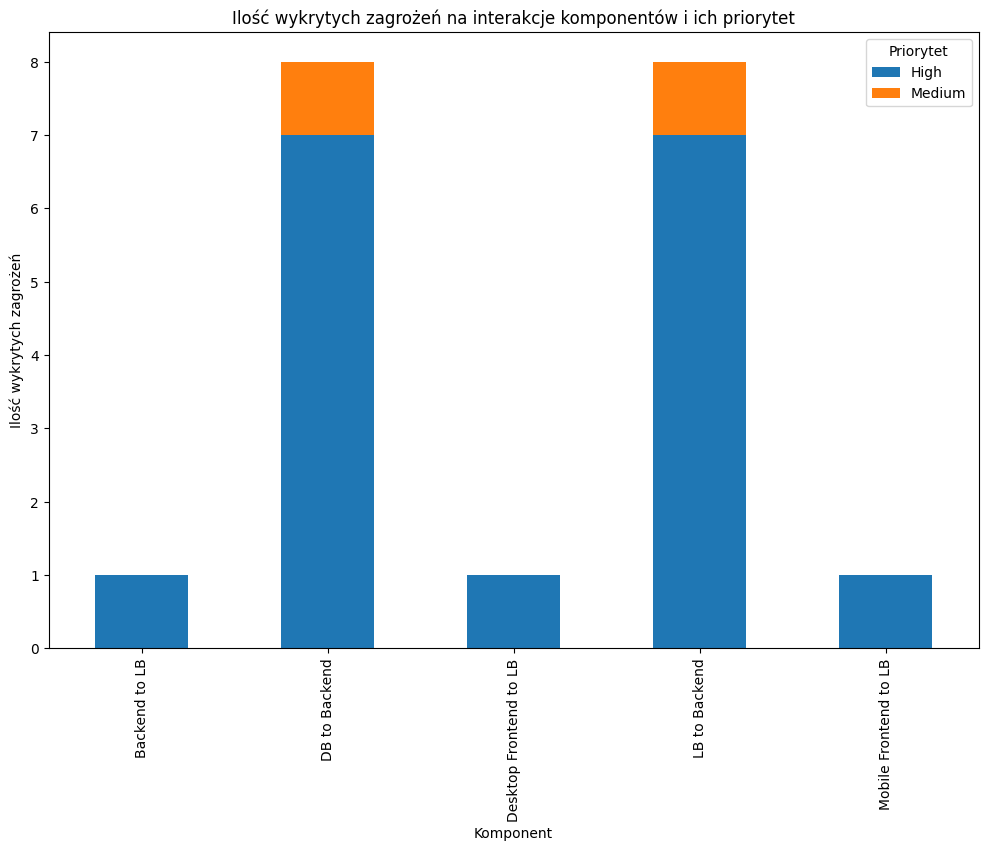

In [94]:
grouped_df = df.groupby(['Interaction Name', 'Priority']).size().unstack(fill_value=0)

grouped_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Ilość wykrytych zagrożeń na interakcje komponentów i ich priorytet')
plt.xlabel('Komponent')
plt.ylabel('Ilość wykrytych zagrożeń')
plt.legend(title='Priorytet')
plt.show()

# Threats in components

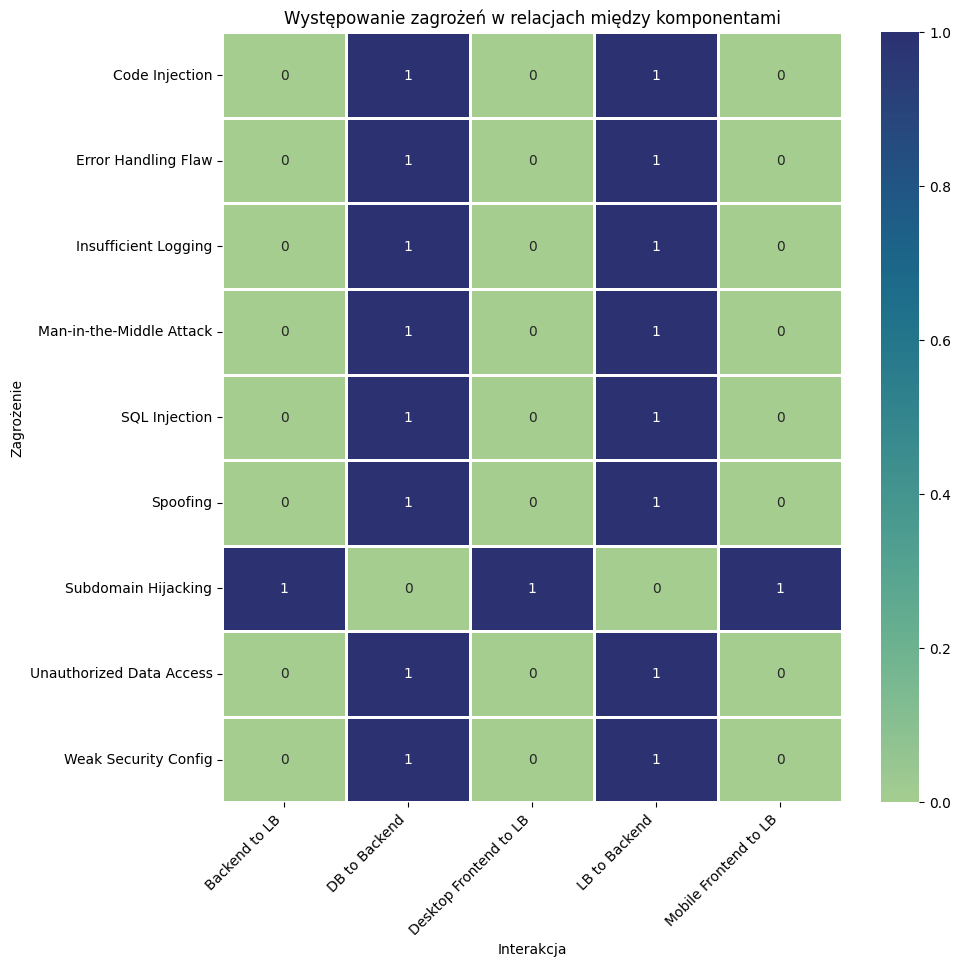

In [95]:
relations_threats_heatmap = df.groupby(["Summary abbv","Interaction Name"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 10))
sns.heatmap(relations_threats_heatmap,annot=True,linewidth=1, fmt="d", cmap="crest")
plt.title('Występowanie zagrożeń w relacjach między komponentami')
plt.xlabel('Interakcja')
plt.ylabel('Zagrożenie')
plt.xticks(rotation=45,ha="right")
plt.show()

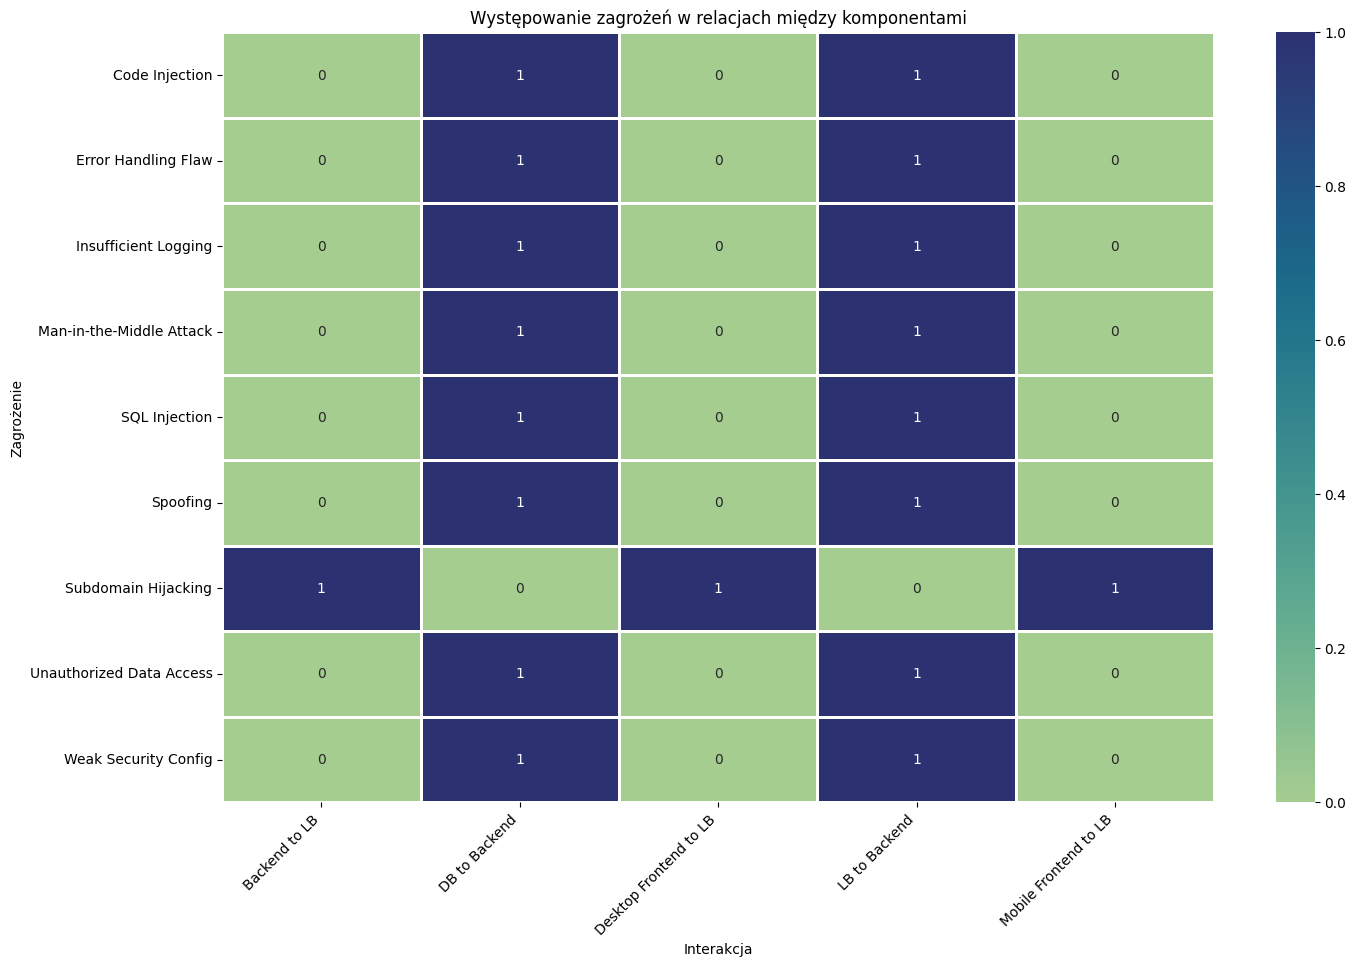

In [96]:
relations_threats_heatmap = df.groupby(["Summary abbv","Interaction Name"]).size().unstack(fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(relations_threats_heatmap,annot=True,linewidth=1, fmt="d", cmap="crest")
plt.title('Występowanie zagrożeń w relacjach między komponentami')
plt.xlabel('Interakcja')
plt.ylabel('Zagrożenie')
plt.xticks(rotation=45,ha="right")
plt.show()

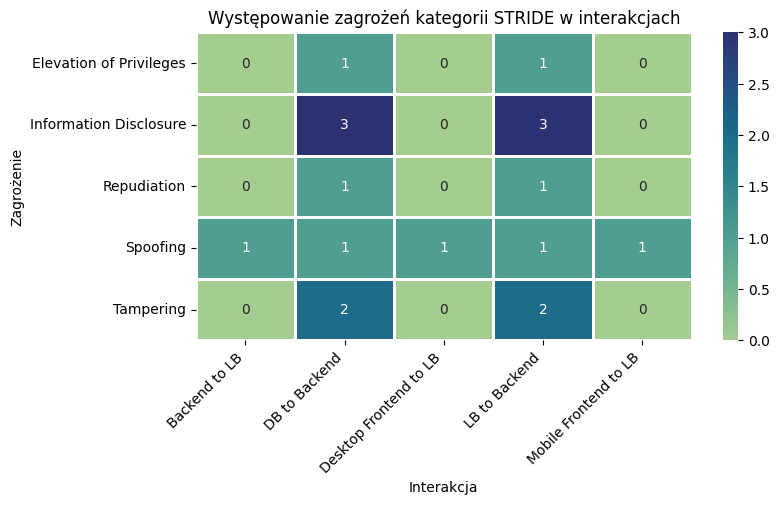

In [97]:
summary_and_category = df.groupby(["Interaction Name","Category"])

summary_and_category_heatmap = summary_and_category.size().unstack(fill_value=0)

# sns.barplot(df["Interaction Name","Category"],x="Interaction Name",y="Category", cmap="YlGnBu")
# plt.title('Występowanie zagrożeń w relacjach między komponentami')
# plt.xlabel('Interakcja')
# plt.ylabel('Zagrożenie')
# plt.xticks(rotation=45,ha="right")
# plt.show()

interaction_category = df[["Interaction Name","Category"]]
category_counts = interaction_category["Category"].value_counts()

# plt.figure(figsize=(10, 6))
# sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
# plt.title('Count of Categories')
# plt.xlabel('Category')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()


interaction_category_heatmap = df.groupby(['Category','Interaction Name']).size().unstack(fill_value=0)
plt.figure(figsize=(8, 4))
sns.heatmap(interaction_category_heatmap, annot=True,linewidth=1,cmap="crest")
plt.title('Występowanie zagrożeń kategorii STRIDE w interakcjach')
plt.xlabel('Interakcja')
plt.ylabel('Zagrożenie')
plt.xticks(rotation=45,ha="right")
plt.show()

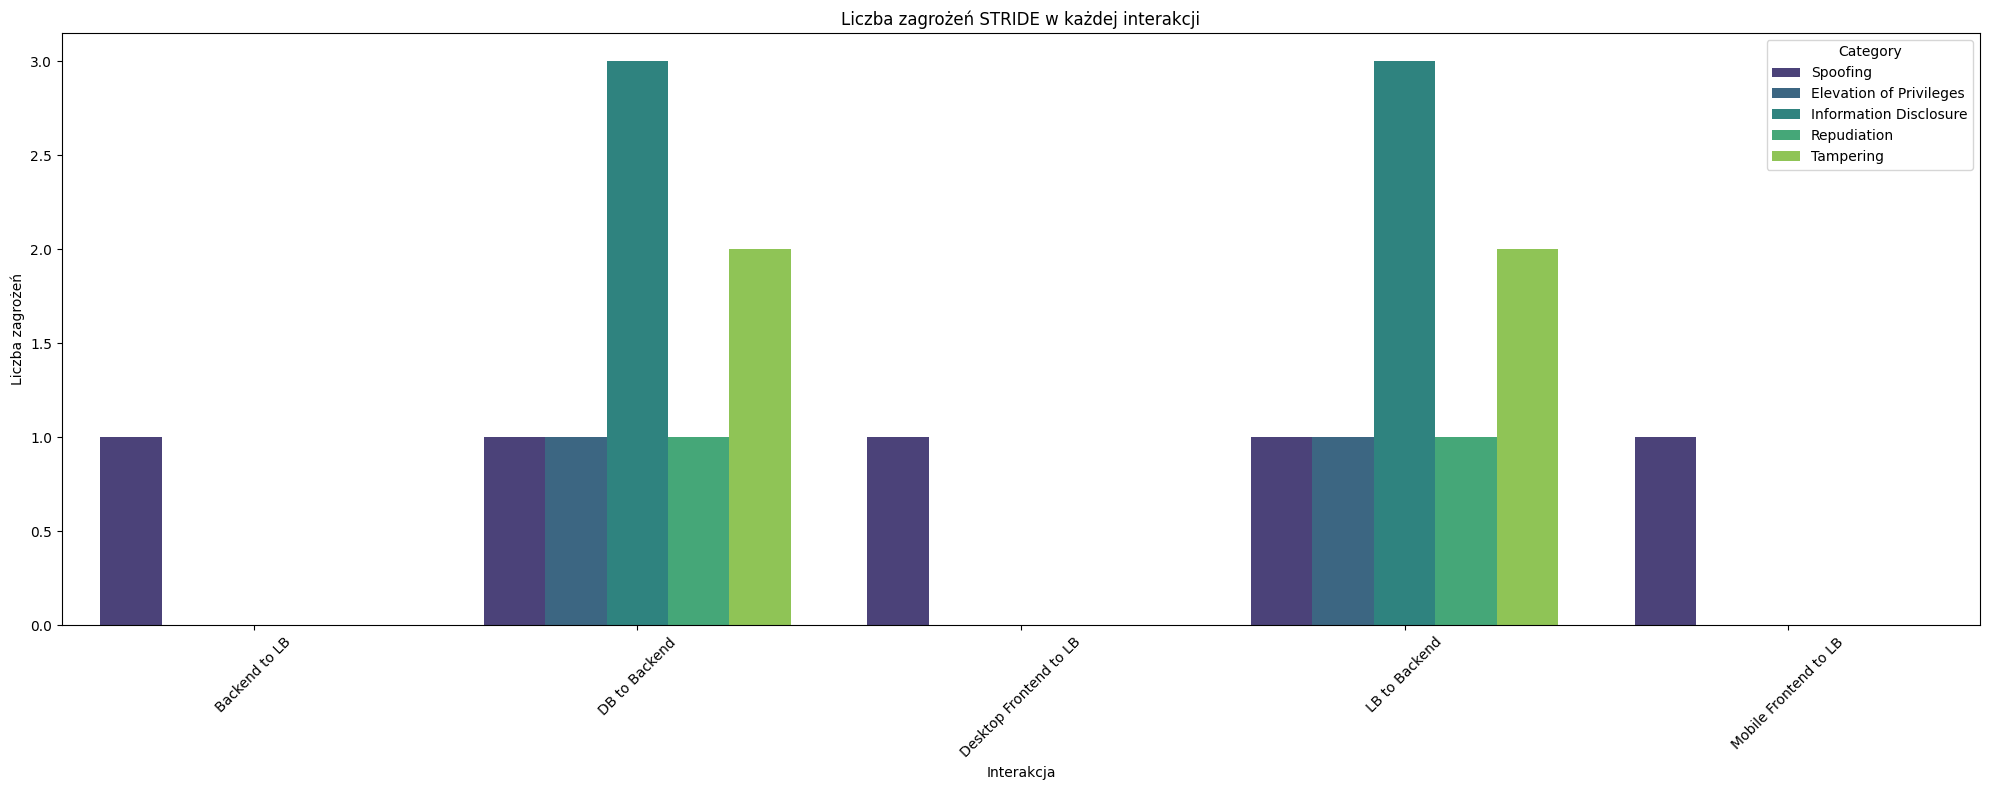

In [98]:
# Grouping by 'Interaction Name' and 'Category' and counting occurrences
interaction_category_counts = df.groupby(['Interaction Name','Category']).size().reset_index(name='Count')

# Plotting the data
plt.figure(figsize=(20, 8))
sns.barplot(x='Interaction Name', y='Count', hue='Category', data=interaction_category_counts, palette='viridis')
plt.title('Liczba zagrożeń STRIDE w każdej interakcji')
plt.xlabel('Interakcja')
plt.ylabel('Liczba zagrożeń')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

In [99]:
import plotly.graph_objects as go

nodes = list(df['Interaction Name'].unique()) + list(df['Category'].unique()) + list(df['Summary abbv'].unique())

# Define links
links = []
for i, row in df.iterrows():
    links.append({
        'source': row['Interaction Name'],
        'target': row['Category'],
        'value': 1
    })
    links.append({
        'source': row['Category'],
        'target': row['Summary abbv'],
        'value': 1
    })

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color=['blue']*len(df['Interaction Name'].unique()) + ['green']*len(df['Category'].unique()) + ['red']*len(df['Summary abbv'].unique())
    ),
    link=dict(
        source=[nodes.index(link['source']) for link in links],
        target=[nodes.index(link['target']) for link in links],
        value=[link['value'] for link in links],
    )
)])

# Update layout
fig.update_layout(title_text="Relationship Between Threats, STRIDE Categories, and Components", height=600)

# Show plot
fig.show()

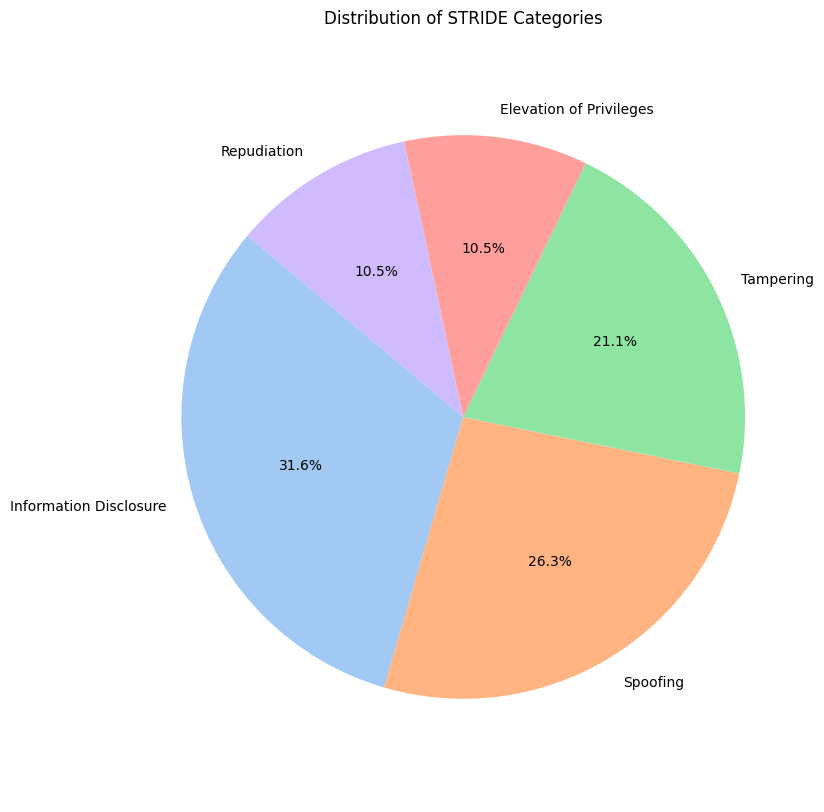

In [100]:
df[['Category','Interaction Name']]

stride_counts = df['Category'].value_counts()

# Set seaborn style
# sns.set(style="whitegrid")

# Create the pie chart using matplotlib
plt.figure(figsize=(8, 10))
colors = sns.color_palette('pastel')[0:len(stride_counts)]
plt.pie(stride_counts, labels=stride_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of STRIDE Categories')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()